삭제된 포스트 체크 하는 파일 

* 이슈  
    * postwithdeleted테이블에는 있지만 db에 있는 post테이블에는 없는 질의 응답 존재 
    * 예시 아이디 > 2335608
    * db에 있는 데이터와 SEDE에 있는 데이터를 짬뽕해서는 숫자를 맞출 수 없음 
    * 그래서 SEDE에 있는 데이터 만드로 확인 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import re
from collections import deque
import datetime

In [2]:
postwithdeleted = pd.read_csv('../../data/postwithdeleted.csv')

In [3]:
postwithdeleted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22412 entries, 0 to 22411
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        22412 non-null  object
 1   posttypeid  22412 non-null  int64 
 2   del_yn      22412 non-null  object
 3   tot_cnt     22412 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 700.5+ KB


In [4]:
postwithdeleted['date_mod'] = pd.to_datetime(postwithdeleted['date'])


In [5]:
postwithdeleted = postwithdeleted.sort_values(by = ['date_mod'], ascending=True).reset_index(drop=True)

In [6]:
postwithdeleted_pivot = pd.pivot_table(data = postwithdeleted, index='date_mod', columns=['posttypeid', 'del_yn'], values = ['tot_cnt']).reset_index()

In [7]:
postwithdeleted_pivot.head()

date_mod tot_cnt                    
posttypeid                  1            2       
del_yn                      N     Y      N      Y
0          2008-07-31     4.0   2.0    2.0    4.0
1          2008-08-01    48.0  14.0   89.0  112.0
2          2008-08-02    25.0  22.0   68.0  197.0
3          2008-08-03    33.0  21.0   97.0  158.0
4          2008-08-04    77.0  49.0  238.0  465.0

In [8]:
postwithdeleted_pivot.columns

MultiIndex([('date_mod', '',  ''),
            ( 'tot_cnt',  1, 'N'),
            ( 'tot_cnt',  1, 'Y'),
            ( 'tot_cnt',  2, 'N'),
            ( 'tot_cnt',  2, 'Y')],
           names=[None, 'posttypeid', 'del_yn'])

In [9]:
postwithdeleted_pivot.columns = ['date_mod', 'q_cnt', 'q_d_cnt', 'a_cnt', 'a_d_cnt']

In [10]:
postwithdeleted_pivot.head()

,date_mod,q_cnt,q_d_cnt,a_cnt,a_d_cnt
0,2008-07-31,4.0,2.0,2.0,4.0
1,2008-08-01,48.0,14.0,89.0,112.0
2,2008-08-02,25.0,22.0,68.0,197.0
3,2008-08-03,33.0,21.0,97.0,158.0
4,2008-08-04,77.0,49.0,238.0,465.0


In [11]:
postwithdeleted_pivot['tot_d_cnt'] = postwithdeleted_pivot['q_d_cnt']+postwithdeleted_pivot['a_d_cnt']
postwithdeleted_pivot['tot_qna_cnt'] = postwithdeleted_pivot['q_cnt']+postwithdeleted_pivot['a_cnt']

In [12]:
postwithdeleted_pivot

,date_mod,q_cnt,q_d_cnt,a_cnt,a_d_cnt,tot_d_cnt,tot_qna_cnt
0,2008-07-31,4.0,2.0,2.0,4.0,6.0,6.0
1,2008-08-01,48.0,14.0,89.0,112.0,126.0,137.0
2,2008-08-02,25.0,22.0,68.0,197.0,219.0,93.0
3,2008-08-03,33.0,21.0,97.0,158.0,179.0,130.0
4,2008-08-04,77.0,49.0,238.0,465.0,514.0,315.0
...,...,...,...,...,...,...,...
5598,2023-11-28,3422.0,510.0,2812.0,448.0,958.0,6234.0
5599,2023-11-29,3522.0,463.0,2876.0,421.0,884.0,6398.0
5600,2023-11-30,3467.0,424.0,2884.0,385.0,809.0,6351.0
5601,2023-12-01,3007.0,388.0,2571.0,295.0,683.0,5578.0


In [13]:
postwithdeleted_pivot['ad_over_qd'] = postwithdeleted_pivot['a_d_cnt']/ postwithdeleted_pivot['q_d_cnt']

In [14]:
postwithdeleted_pivot = postwithdeleted_pivot[postwithdeleted_pivot['date_mod']>='2013-11-30']

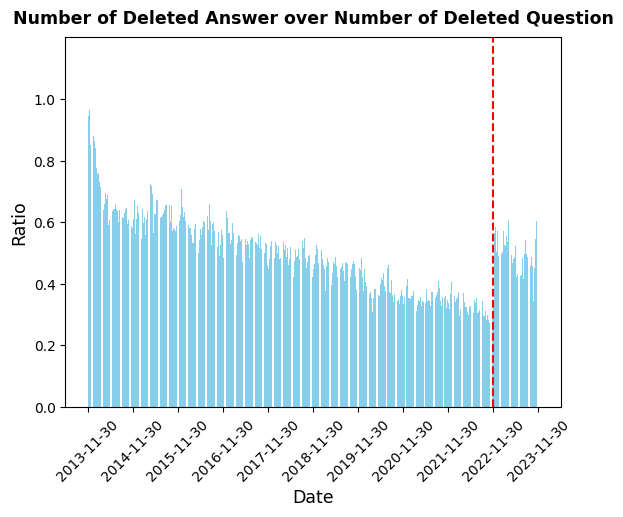

In [15]:
fig, ax = plt.subplots()


ax.bar(postwithdeleted_pivot.date_mod
    ,  height = postwithdeleted_pivot['ad_over_qd']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Number of Deleted Answer over Number of Deleted Question", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Ratio", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)
plt.show();

In [21]:
postwithdeleted_pivot[postwithdeleted_pivot['date_mod']>= '2022-11-30'].head(20)

,date_mod,q_cnt,q_d_cnt,a_cnt,a_d_cnt,tot_d_cnt,tot_qna_cnt,ad_over_qd
5235,2022-11-30,4190.0,3387.0,5331.0,1038.0,4425.0,9521.0,0.306466
5236,2022-12-01,4285.0,3378.0,5153.0,1141.0,4519.0,9438.0,0.337774
5237,2022-12-02,4759.0,1998.0,5026.0,1542.0,3540.0,9785.0,0.771772
5238,2022-12-03,2935.0,1485.0,2989.0,1609.0,3094.0,5924.0,1.083502
5239,2022-12-04,2913.0,1584.0,2950.0,1810.0,3394.0,5863.0,1.142677
5240,2022-12-05,4957.0,2191.0,4816.0,1742.0,3933.0,9773.0,0.795071
5241,2022-12-06,5299.0,2280.0,5240.0,1770.0,4050.0,10539.0,0.776316
5242,2022-12-07,5001.0,2111.0,5138.0,1509.0,3620.0,10139.0,0.714827
5243,2022-12-08,4868.0,1947.0,5030.0,1488.0,3435.0,9898.0,0.764253
5244,2022-12-09,4261.0,1800.0,4499.0,1018.0,2818.0,8760.0,0.565556


NameError: name 'df_qna_d_merge' is not defined

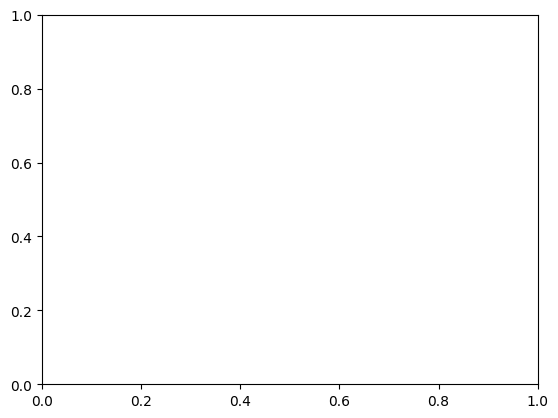

In [16]:
fig, ax = plt.subplots()


ax.bar(df_qna_d_merge.ddate_mod
    ,  height = df_qna_d_merge['a_d_cnt']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Ratio of Answered Question", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Ratio", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)
plt.show();

In [ ]:
df_qna_d_merge['a_d_over_q_d'] = df_qna_d_merge['a_d_cnt']/df_qna_d_merge['q_d_cnt']

In [ ]:
fig, ax = plt.subplots()


ax.bar(df_qna_d_merge.ddate_mod
    ,  height = df_qna_d_merge['a_d_over_q_d']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Ratio of Answered Question", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Ratio", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)
plt.show();